In [1]:
from qiskit import *
import matplotlib

# H (Hadamard)
La porte Hadamard donne à un seul qbit la même probabilité de retourner 1 ou 0, transformant transforme l'état 
${\displaystyle |0\rangle }$ en ${\displaystyle {\frac {|0\rangle +|1\rangle }{\sqrt {2}}}}$ et l'état ${\displaystyle |1\rangle }$ en $ {\displaystyle {\frac {|0\rangle -|1\rangle }{\sqrt {2}}}}$

In [2]:
"""# H (Hadamard)
nbQbit= int(input("Nb de Qbit"))
circ = QuantumCircuit(nbQbit,4)
circ.h(0)
circ.measure(0, 0)

circ.draw('mpl')"""

'# H (Hadamard)\nnbQbit= int(input("Nb de Qbit"))\ncirc = QuantumCircuit(nbQbit,4)\ncirc.h(0)\ncirc.measure(0, 0)\n\ncirc.draw(\'mpl\')'

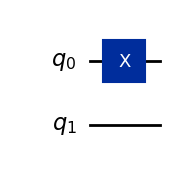

In [3]:
# X(NOT)
circ = QuantumCircuit(2)
circ.x(0)

circ.draw('mpl')

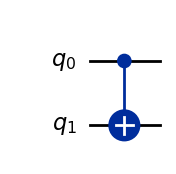

In [4]:
# CNOT
circ = QuantumCircuit(2)
circ.cx(0,1)

circ.draw('mpl')

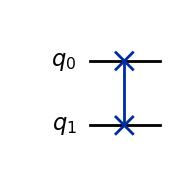

In [5]:
# SWAP
circ = QuantumCircuit(2)
circ.swap(0,1)

circ.draw('mpl')

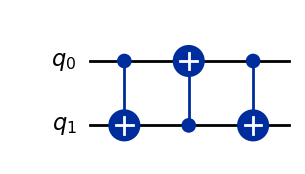

In [6]:
# SWAP
circ = QuantumCircuit(2)
circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)
circ.draw('mpl')

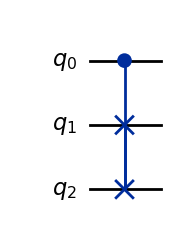

In [7]:
# CSWAP
circ = QuantumCircuit(3)
circ.cswap(0,1,2)

circ.draw('mpl')

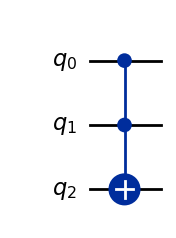

In [8]:
# TOF(CCNOT)
circ = QuantumCircuit(3)
circ.ccx(0,1,2)

circ.draw('mpl')

# état de Bell
Dans cet état, nous avons une chance égale de mesurer 00 et 11. C'est grâce à l'intrication quantique des deux qbits.
Circuit de base :

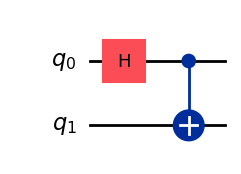

In [9]:

#Création d’un circuit quantique instance de QuantumCircuit
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)

circ.draw('mpl')

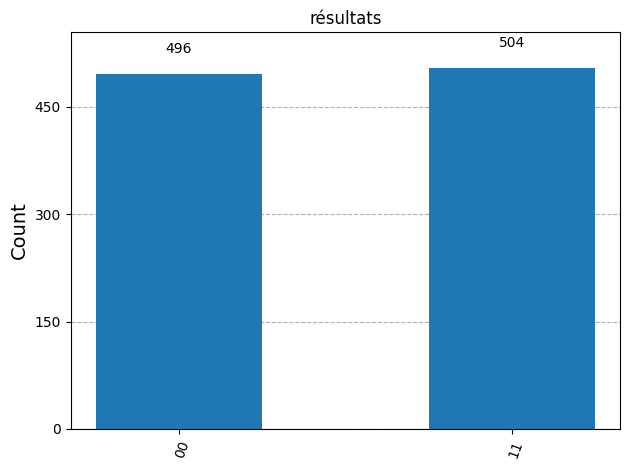

In [11]:
#Création d’un circuit quantique instance de QuantumCircuit
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)
circ.measure_all()
#Available backends
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('aer_simulator')
# OU directement :
# simulator = AerSimulator()
compiled_circuit = transpile(circ, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts, title='résultats')

# 

In [ ]:
""" from qiskit_ibm_runtime import QiskitRuntimeService
# Une seule fois : enregistre ton token
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="VOTRE_TOKEN")
# Chargement du compte
service = QiskitRuntimeService(channel="ibm_quantum")
# Choisir un backend réel
backend = service.backend("ibm_quito") # exemple machine réelle
# Transpilation et exécution
from qiskit import backend.run
optimized_circuit = backend.run(circ, backend)
job = backend.run(optimized_circuit, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts) """

# Téléportation

In [ ]:
"""# X(NOT)
circ = QuantumCircuit(3)
c = ClassicalRegister(2)
circ.h(1)
# => état de Bell
circ.cx(1, 2)
circ.cx(0,1)
circ.h(0)
circ.measure(1, c[1])
circ.measure(0, c[0])
if (c[1]==1):
    circ.x(2)
    circ.measure(2, c[1])
if (c[0]==1):
    circ.z(2)
    circ.measure(2, c[0])
circ.draw('mpl')"""


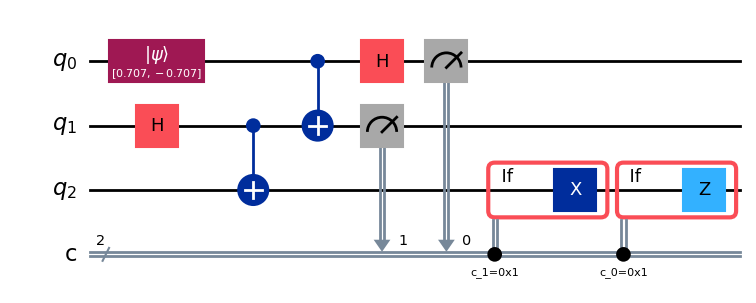

In [19]:
# Téléportation 
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
circ = QuantumCircuit(3,2)
circ.initialize([1/np.sqrt(2),-1/np.sqrt(2)],0)
circ.h(1)
circ.cx(1,2)
circ.cx(0,1)
circ.h(0)
circ.measure(0, 0)
circ.measure(1, 1)
with circ.if_test((1, 1)) :
    circ.x(2)
with circ.if_test((0, 1)) :
    circ.z(2)

circ.draw('mpl')

Statevector([-0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             -0.70710678+8.65956056e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2))


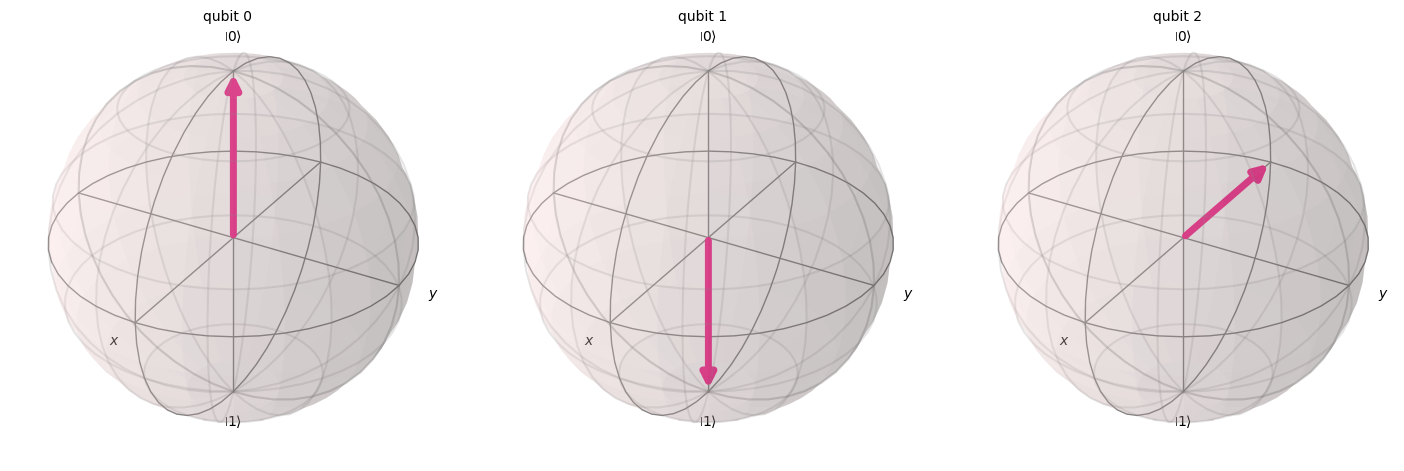

In [20]:


simulator = Aer.get_backend('statevector_simulator')
# simulator = AerSimulator()
job = simulator.run(circ, shots=1000)
result = job.result()
state_vector = result.get_statevector()

# Print the statevector
print(state_vector)

plot_bloch_multivector(state_vector)